In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import lightdde.geometry.geometry_torch as geometry

In [2]:
cube = geometry.Hypercube([1.0, 0.0], [3.0, 1.0],)

## On_boundary testing

In [3]:
x = torch.tensor([
    [1.5, 0.0],
    [1.25, 1.0],
    [2.0, 0.2]
])

out = cube.on_boundary(x)

In [4]:
out

tensor([ True,  True, False])

## Uniform points

In [5]:
points = cube.uniform_points(1000, boundary=False)
points_with_bc = cube.uniform_points(1000, boundary=True)

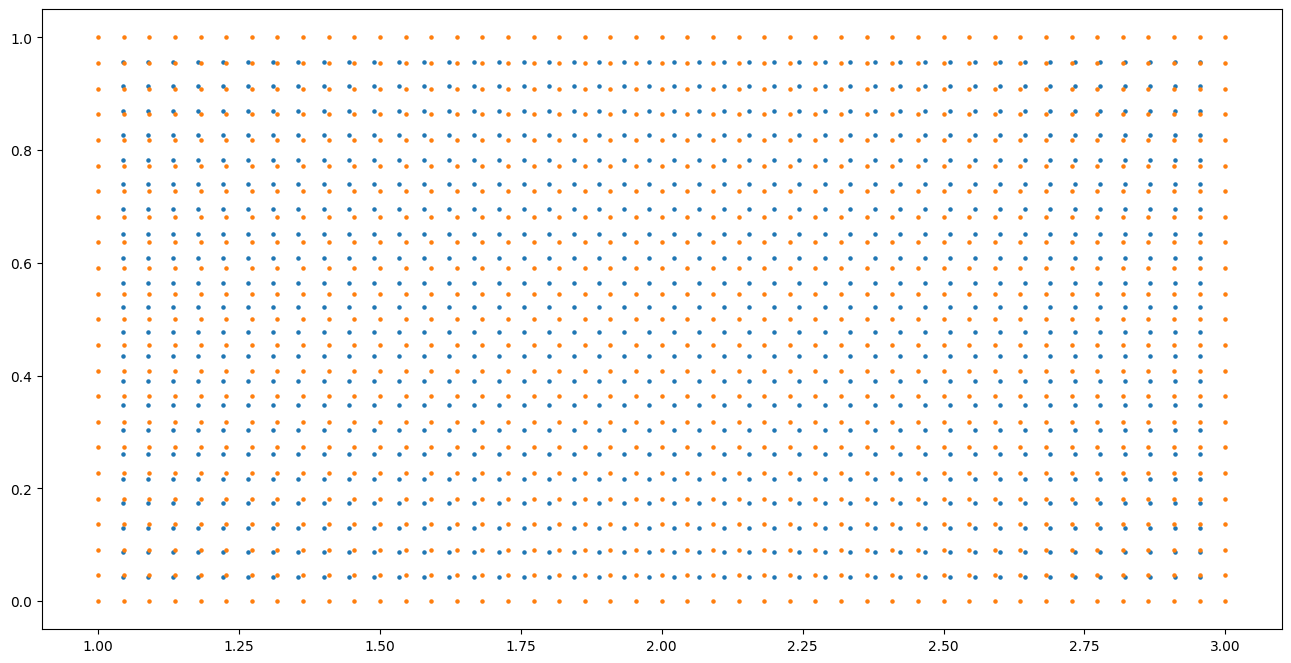

In [6]:
plt.figure(figsize=(16, 9))
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.scatter(points_with_bc[:, 0], points_with_bc[:, 1], s=5)
plt.gca().set_aspect('equal')
plt.show()

## Random points

In [7]:
points_lhs = cube.random_points(5000, random="pseudo")

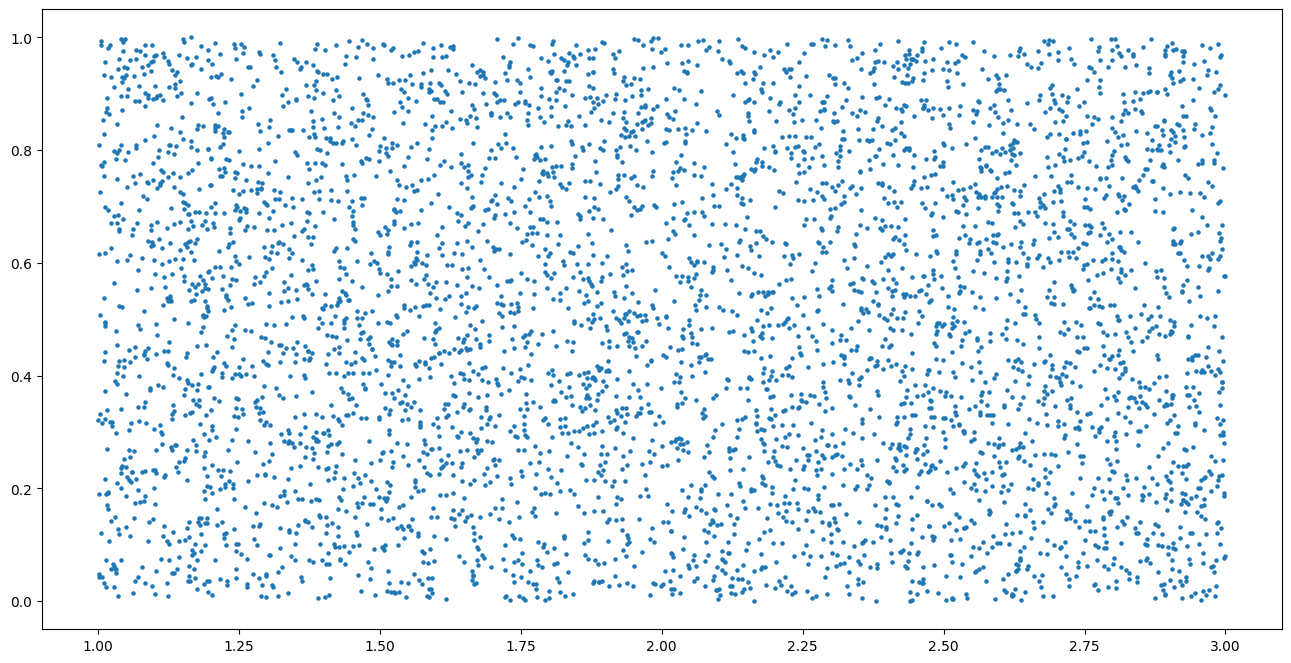

In [8]:
plt.figure(figsize=(16, 9))
plt.scatter(points_lhs[:, 0], points_lhs[:, 1], s=5)
# plt.scatter(points_with_bc[:, 0], points_with_bc[:, 1], s=5)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
close_points = np.isclose(points_lhs[:, 0], 3.0, atol=0.001) 

In [10]:
points_lhs[close_points]

tensor([[2.9999, 0.5776],
        [2.9998, 0.0804]])

## Boundary points

In [11]:
cube = geometry.Hypercube([1.0, 0.0], [3.0, 1.0],)

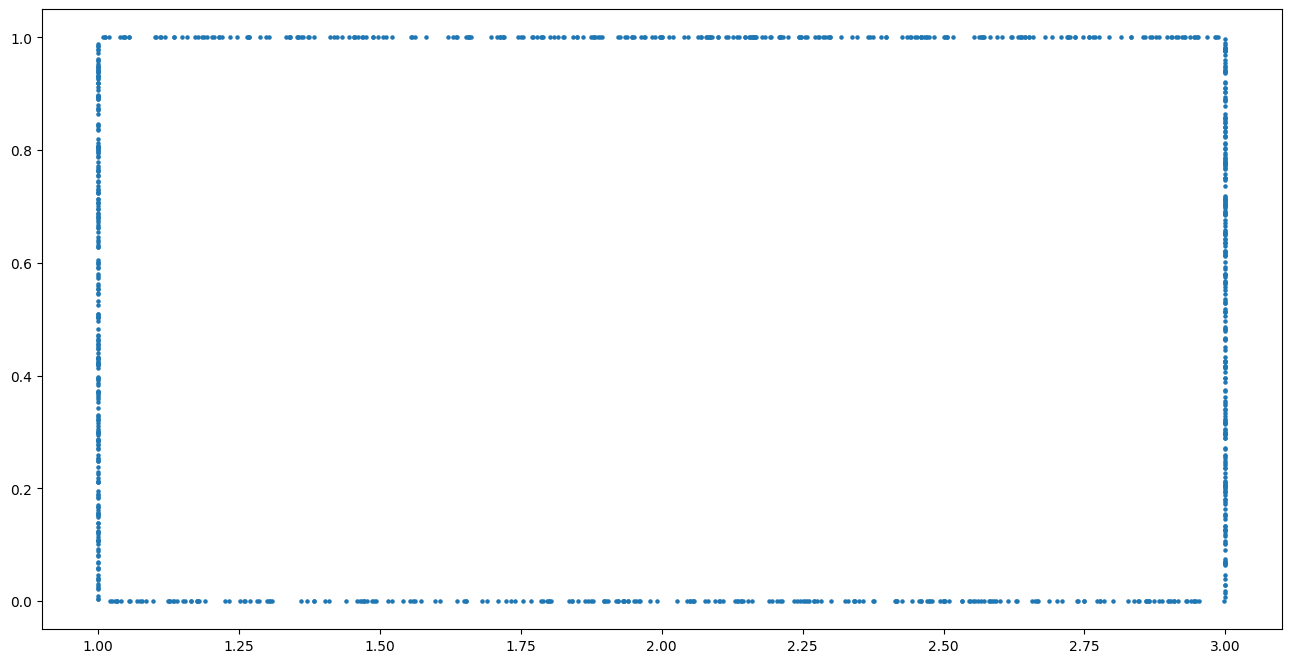

In [12]:
points_bc = cube.random_boundary_points(1000)
plt.figure(figsize=(16, 9))
plt.scatter(points_bc[:, 0], points_bc[:, 1], s=5)
plt.gca().set_aspect('equal')
plt.show()

## 3D Cube

In [13]:
cube = geometry.Hypercube([1.0, 0.0, 0.0], [3.0, 1.0, 2.0])

In [14]:
points_lhs_3d = cube.random_points(5000)

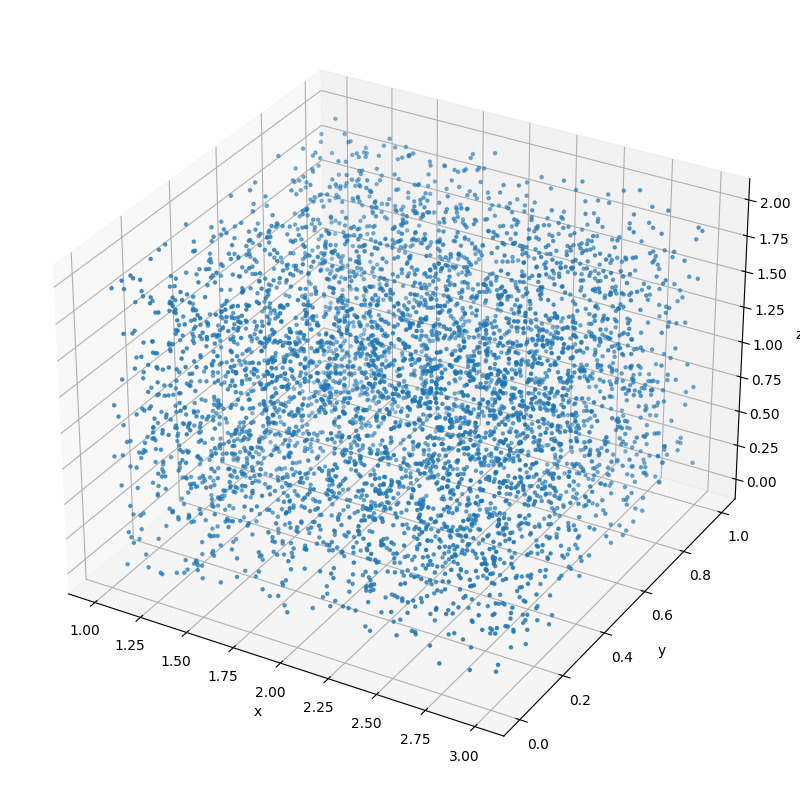

In [15]:
fig = plt.figure(figsize=(10, 13))
ax = fig.add_subplot(projection="3d")
ax.scatter(points_lhs_3d[:, 0], points_lhs_3d[:, 1], points_lhs_3d[:, 2], s=5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

## Boundary conditions test

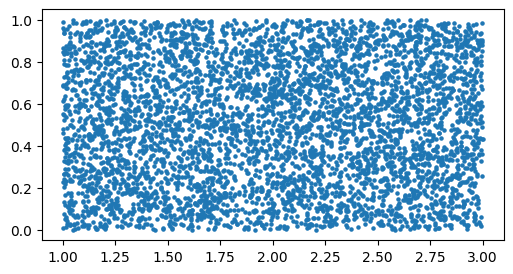

In [3]:
cube = geometry.Hypercube([1.0, 0.0], [3.0, 1.0],)

points = cube.random_points(5000)

plt.figure(figsize=(6, 3))
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.gca().set_aspect('equal')
plt.show()

In [8]:
def lwall_boundary(x, on):
    return on and torch.isclose(x[0], torch.tensor(1.0))

def lwall_bc(x):
    return (x[:, 1:2] - 0.5)**2

In [9]:
import lightdde as dde

In [10]:
rwall_bc = dde.bc.DirichletBC(cube, lwall_bc, lwall_boundary, component=0)

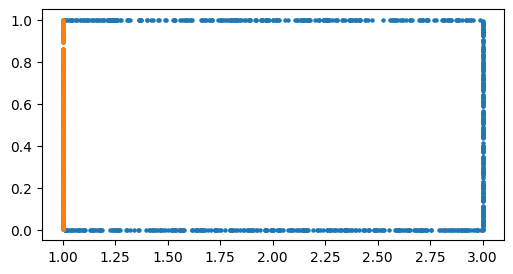

In [11]:
bc_points = cube.random_boundary_points(1000)
marked_points = rwall_bc.filter(bc_points)

plt.figure(figsize=(6, 3))
plt.scatter(bc_points[:, 0], bc_points[:, 1], s=5)
plt.scatter(marked_points[:, 0], marked_points[:, 1], s=5)
plt.gca().set_aspect('equal')
plt.show()

In [12]:
marked_points.shape

torch.Size([256, 2])

In [13]:
pred = lwall_bc(bc_points)
err = rwall_bc(bc_points, pred)

In [14]:
err.shape

torch.Size([256, 1])

In [15]:
err

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      